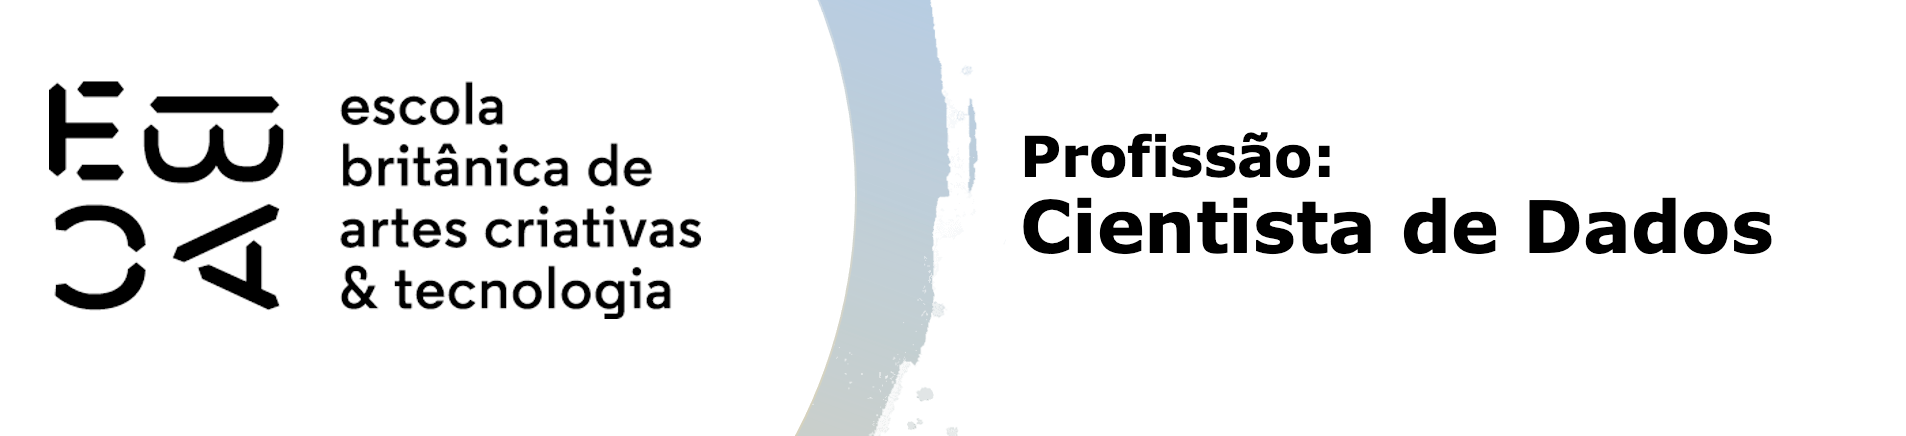

# Métodos hierárquicos de agrupamento

## Objetivos

O objetivo desta aula é ter um primeiro contato com os comandos desse método e ver seus resultados de forma bem pragmática. Em seguida vamos entrar nos detalhes do algoritmo, diferenças para o *k-means*, hiperparâmetros, etc.

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

## Carregando a base de dados

Vamos carregar a base de dados ```penguins``` com a ajuda do Seaborn. Vamos também fazer um tratamento bem simples:
- Nomear o índice, para podermos voltar a informação dos agrupamentos na base original - vamos usar esse índice como chave, para isso ele deve ter um nome.
- Eliminar valores missing nas variáveis quantitativas.

In [2]:
peng = sns.load_dataset('penguins')
peng.index.name='id'
peng_num = peng.select_dtypes(include='number').dropna()

## Visualização dos dados

O gráfico de dispersão nos mostra os dados que vamos ajustar, colorido pela espécie. Lembrando que embora as espécies mostrem agrupamentos naturais nessa base de dados, não queremos classificar os dados nas espécies, mas sim encontrar padrões naturais - que se coincidirem com as espécies será somente uma feliz coincidência.

d:\OneDrive\Program\01 - scripts-base\EBAC\ebac_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\OneDrive\Program\01 - scripts-base\EBAC\ebac_env\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
d:\OneDrive\Program\01 - scripts-base\EBAC\ebac_env\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
d:\OneDrive\Program\01 - sc

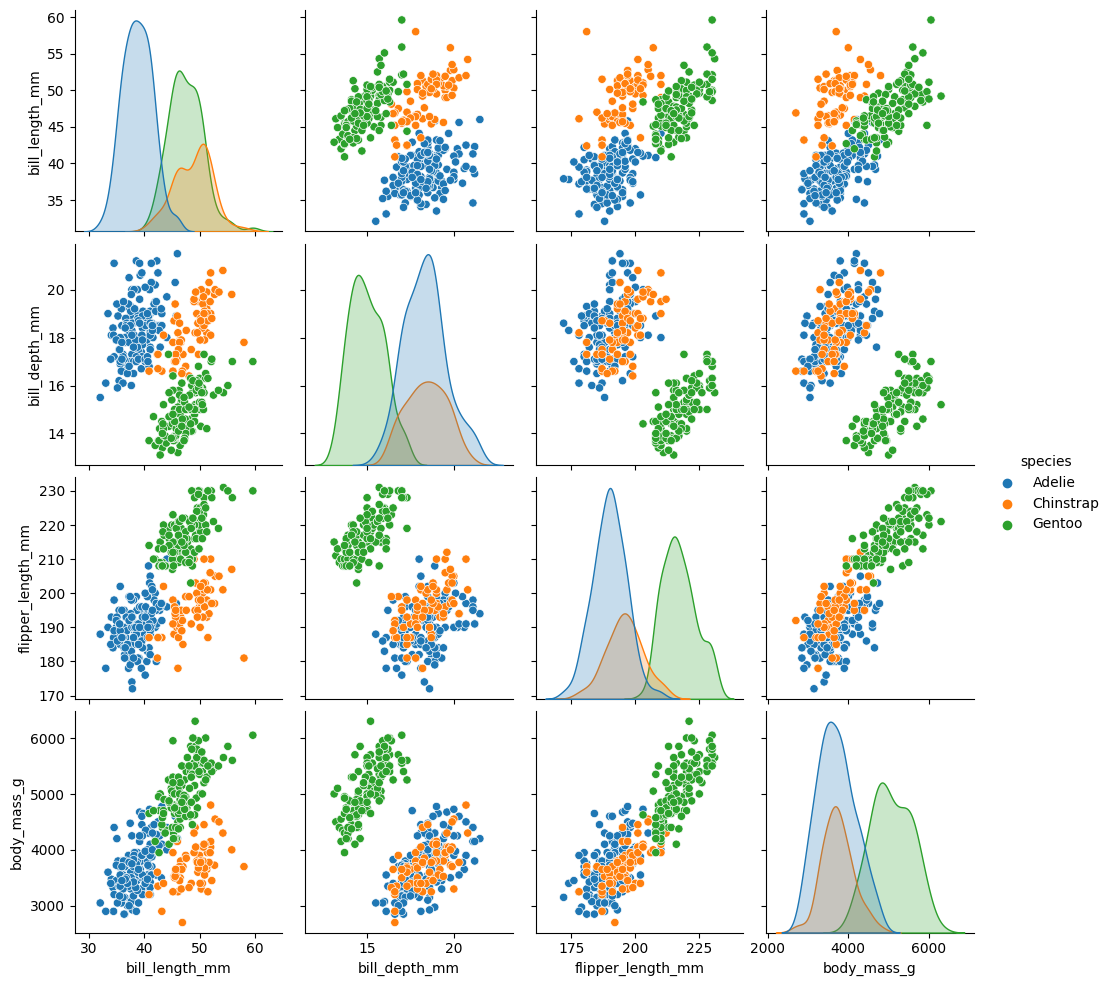

In [3]:
sns.pairplot(data=peng, hue='species')
plt.show()

## Padronização dos dados

Há várias formas de se fazer uma padronização dos dados, uma das mais populares é esta, que deixa a variável com média zero e desvio padrão 1.

In [4]:
padronizador = StandardScaler()
peng_pad = padronizador.fit_transform(peng_num)

## Definir o objeto do agrupamento

Como em diversos procedimentos no Python / Scikit Learn, vamos definir um objeto da classe do agrupamento que queremos fazer - isso significa que ele vai ter os métodos e atributos convenientes para o nosso estudo. Vamos indicar neste passo também os parâmetros do algoritmo.

Como de costume, neste passo não colocamos os dados de entrada.

In [5]:
clus = AgglomerativeClustering(linkage="complete", 
                                 distance_threshold = None, 
                                 n_clusters=3)

## Treinar o algoritmo

Agora sim indicamos os dados, o algoritmo roda, e no objeto criado ficam as informações pertinentes, como por exemplo o rótulo dos grupos para cada linha do *data frame*..

In [6]:
clus.fit(peng_pad)


AgglomerativeClustering(linkage='complete', n_clusters=3)

## Marcando a base original

Primeiramente vamos marcar os rótulos na base de treinamento utilizando o atributo ```labels_``` do objeto de agrupamento. Em seguida vamos colocar essa informação na tabela original.

In [7]:
peng_num['grupo'] = clus.labels_
peng_num.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,grupo
id,,,,,
0,39.1,18.7,181.0,3750.0,1
1,39.5,17.4,186.0,3800.0,1
2,40.3,18.0,195.0,3250.0,1
4,36.7,19.3,193.0,3450.0,1
5,39.3,20.6,190.0,3650.0,1



Lembrando que removemos valores missing, o que tem impacto com a ordem das linhas da tabela. Assim, precisamos fazer um *left join* usando como chave o *index* da base original, o qual demos um nome logo que carregamos os dados, especialmente para poder executar este passo.

In [8]:
peng = peng.merge(peng_num['grupo'], how='left', on='id')

In [9]:
peng.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,grupo
id,,,,,,,,
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,1.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,1.0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,1.0
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,1.0


## Visualizando os grupos

Fazendo o gráfico original, mas pintando pelos grupos, a impressão visual de identificação de padrões é muito boa. Aparentemente conseguimos identificar muito bem grupos de pinguins semelhantes dentro do grupo, mas diferentes entre grupos.

d:\OneDrive\Program\01 - scripts-base\EBAC\ebac_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\OneDrive\Program\01 - scripts-base\EBAC\ebac_env\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
d:\OneDrive\Program\01 - scripts-base\EBAC\ebac_env\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
d:\OneDrive\Program\01 - sc

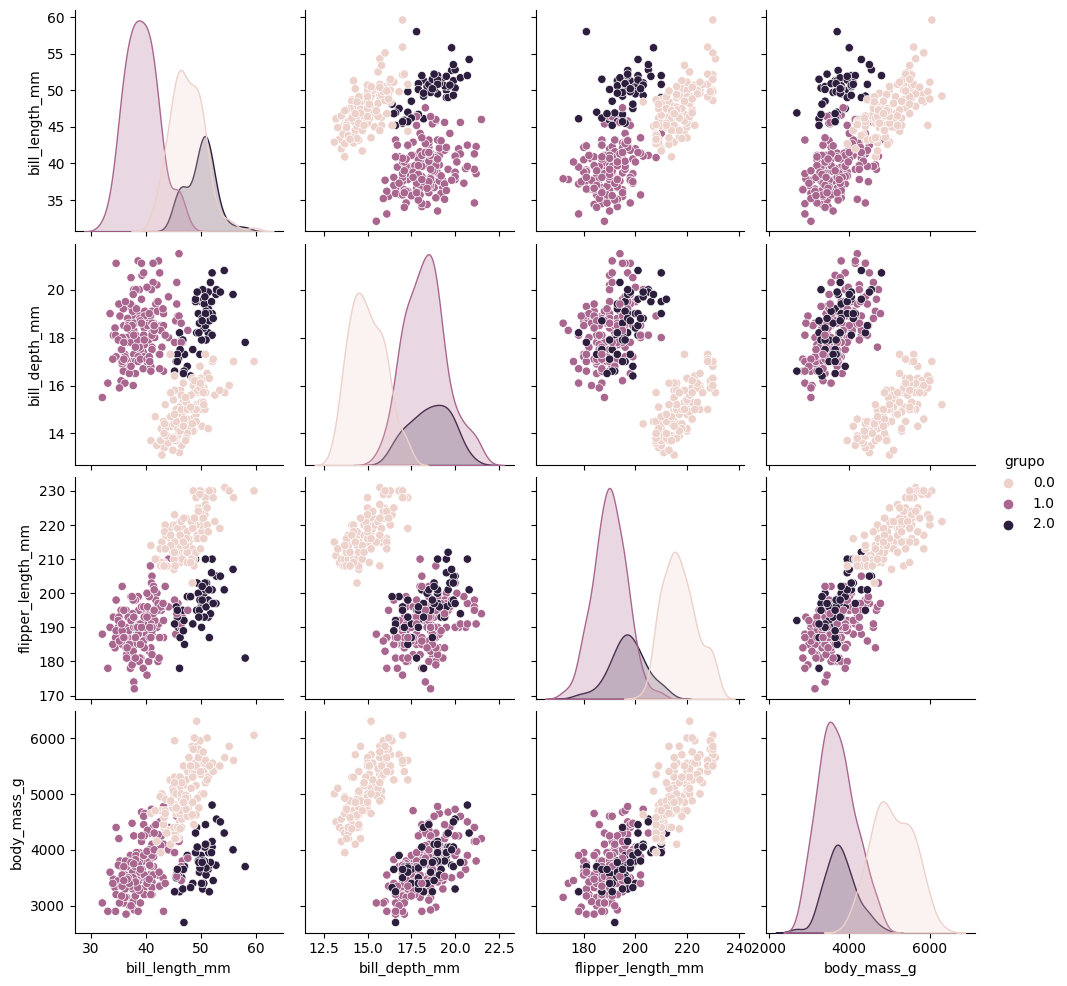

In [10]:
sns.pairplot(data=peng, hue='grupo')

In [11]:
pd.crosstab(peng['species'], peng['grupo'])

grupo,0.0,1.0,2.0
species,,,
Adelie,0,151,0
Chinstrap,0,14,54
Gentoo,123,0,0
